In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.container as mc
import seaborn as sns

In [52]:
# Save to df
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

# Shape and preview
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)
train.head()

Train set shape: (103904, 25)
Test set shape: (25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


`Unnamed: 0` column is not necessary.

In [53]:
ytest = test['satisfaction']
test.drop(columns=['satisfaction'],inplace=True)
train.drop(columns=['Unnamed: 0'],inplace=True)
test.drop(columns=['Unnamed: 0'],inplace=True)

Feature descriptions:

Gender: Gender of the passengers (`Female`, `Male`)

Customer Type: The customer type (`Loyal customer`, `disloyal customer`)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (`Personal Travel`, `Business Travel`)

Class: Travel class in the plane of the passengers (`Business`,`Eco`, `Eco Plus`)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (`0:Not Applicable`;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Summary:

- Here we find airline data with basic info. and with that we try to predict satisfaction level for the passenger.


Issue with dataset :

1. Dirty Data:
   - Coulmns which shows ranking in them there is one value `0` which means we have not data about that. `complitness`
   - `Arrival Delay in Minutes` have missing value `complitness`  
2. Messy Data:

1. Data Cleaning:

Missing values

In [54]:
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(test.isna().sum())

TRAIN SET MISSING VALUES:
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                   

In [55]:
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [56]:
train.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes        

In [57]:
train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

>EDA

Text(0.5, 1.0, 'Target distribution')

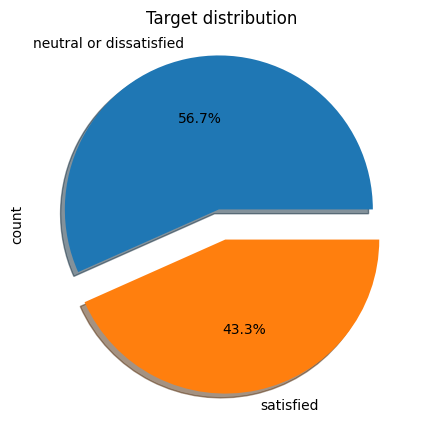

In [58]:
# Figure size
plt.figure(figsize=(5,5))

# Pie plot
train['satisfaction'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':10}).set_title("Target distribution")

- Data is little bit biased towards the `neutral or dissatisfied` value

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

- Categorical Features:

In [60]:
import matplotlib.container as mc
def cat_vis(x,hue,f=18,g=10):
    plt.figure(figsize=(12,5))
    g_t = []
    ax = sns.countplot(data=train,x=x,hue=hue,palette='mako',width=0.5)
    for i in range(train[ax.get_legend().get_title().get_text()].nunique()):
        for j in range(train[ax.get_xlabel()].nunique()):
            globals()['__' + str(i) + str(j)] =  int(str(plt.bar_label(ax.containers[i])[j]).split("'")[1])
            g_t.append(globals()['__' + str(i) + str(j)])

    labels = [mc.Container.get_label(ax.containers[x]) for x in range(train[ax.get_legend().get_title().get_text()].nunique())]
    titles = [str(ax.get_xticklabels()[x]).split("'")[1] for x in range(train[ax.get_xlabel()].nunique())]
    total = [sum(g_t[x::len(g_t)//2]) for x in range(train[ax.get_xlabel()].nunique())]
    data = [g_t[x::len(g_t)//2] for x in range(train[ax.get_xlabel()].nunique())]
    color = sns.color_palette('pastel')
    plt.figure(figsize=(f,g))
    ax1 = plt.subplot2grid((train[ax.get_xlabel()].nunique(),2),(0,0))
    plt.pie(total,labels=titles,autopct='%0.2f%%',colors=color)
    plt.title(ax.get_xlabel())
    ax1 = plt.subplot2grid((train[ax.get_xlabel()].nunique(),2),(0,1))
    grand_labels = [x+" & " +y for x in labels for y in titles]
    plt.pie(g_t,labels=grand_labels,autopct='%0.2f%%',colors=color)
    plt.title('Corelation')
    t,j = 1,0
    for i in range(train[ax.get_xlabel()].nunique()):
        if j == 2:
            t+=1
            j = 0
        ax1 = plt.subplot2grid((train[ax.get_xlabel()].nunique(),2),(t,j))
        plt.title(titles[i])
        plt.pie(data[i],labels=labels, autopct='%0.2f%%',colors=color)
        j+=1
    plt.show()

1] Gender:

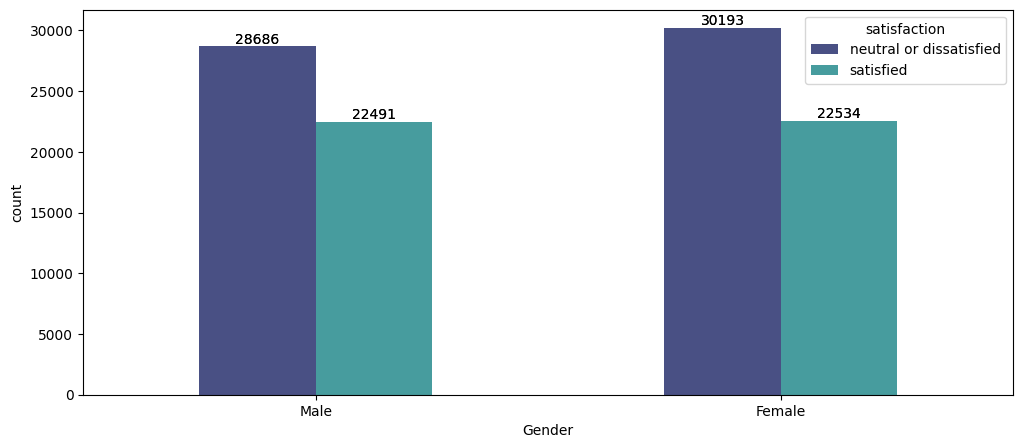

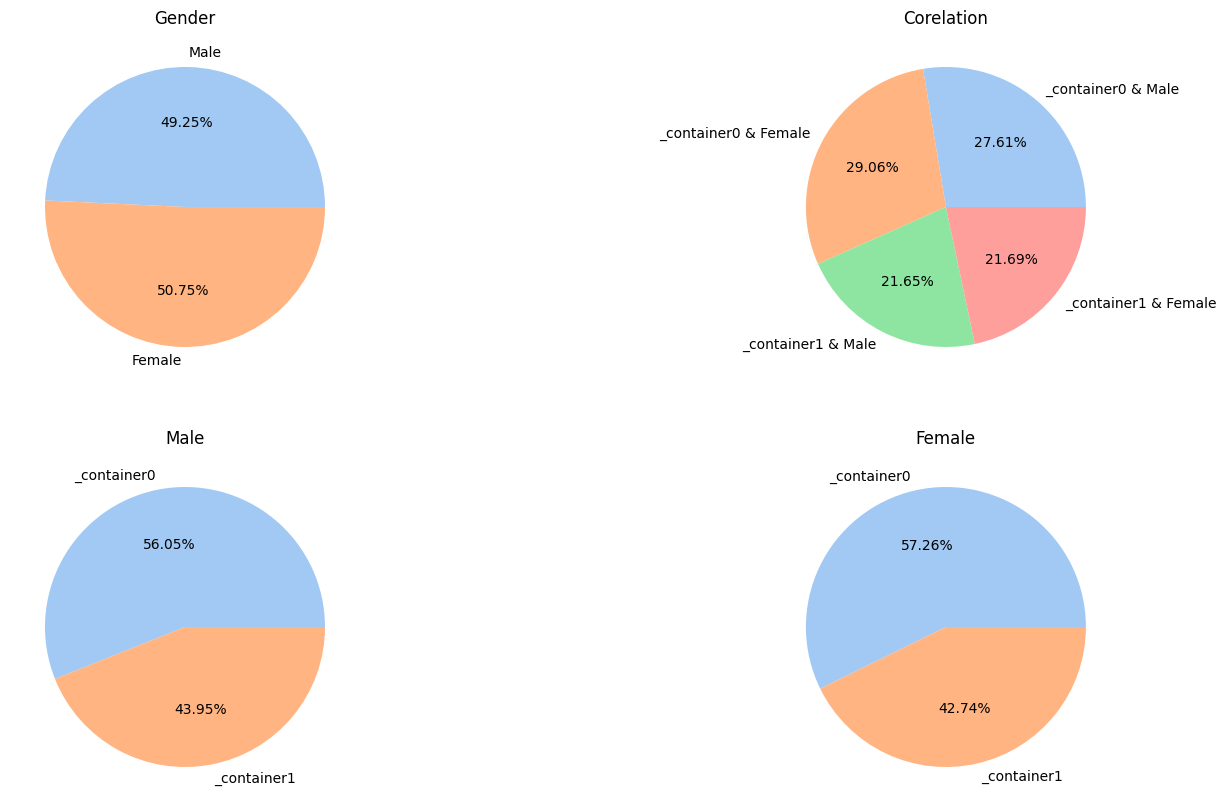

In [61]:
cat_vis('Gender','satisfaction')

One hot encoding for male and female and chances of survival for 
male : 44%
female : 43%

2] Customer Type:

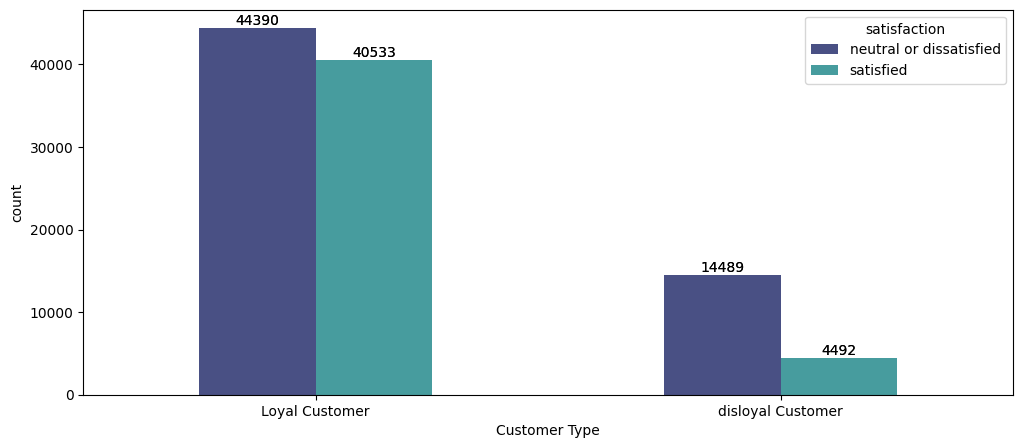

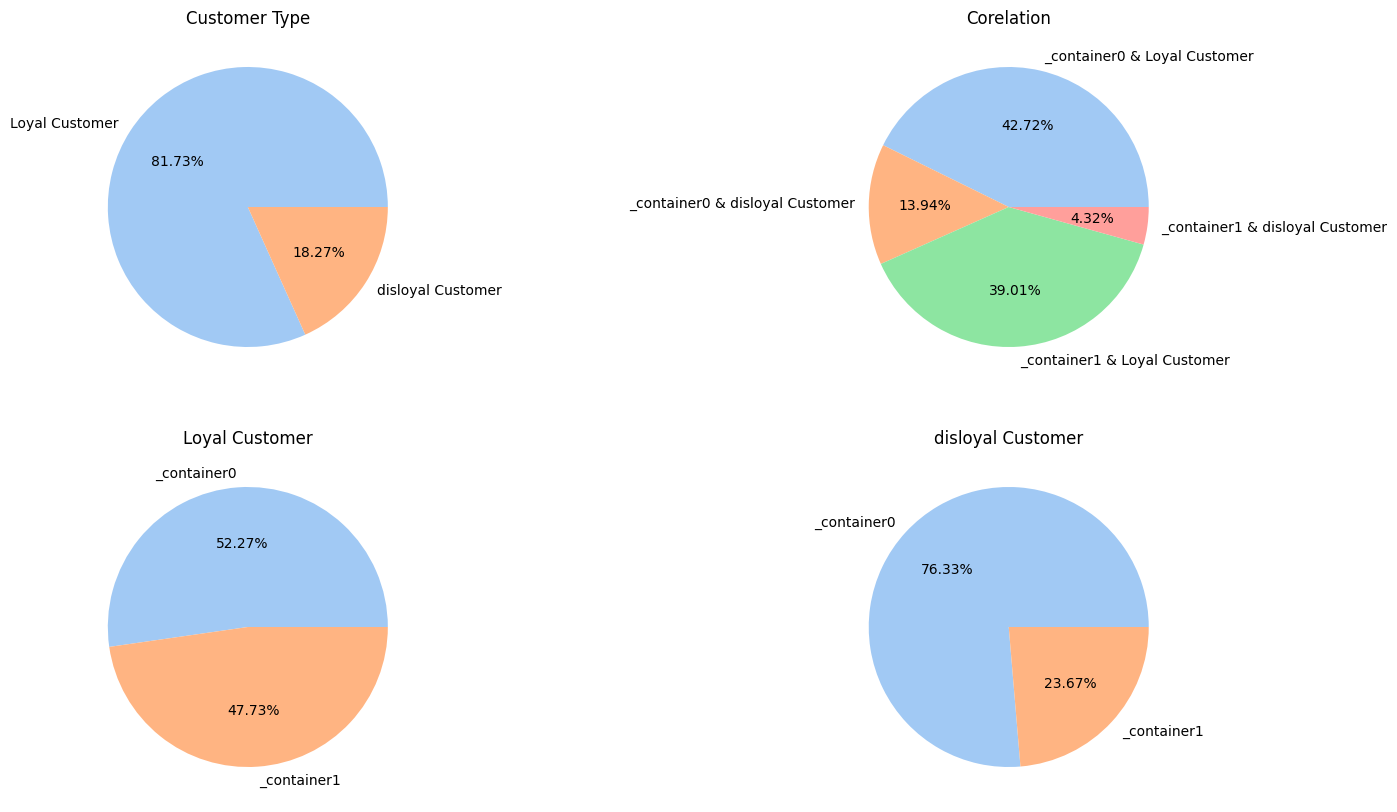

In [62]:
cat_vis('Customer Type','satisfaction')

- Data for `Customer Type` is biased towards 'Loyal Customer'.
- 'Loyal Customers' are more satisfied, that's why it's more correlated to satisfaction.
- so we use ordinal encoding `Customer Type`.
  1. 'Loyal Customers'
  2. 'disloyal Customers' 

3] Type of Travel:

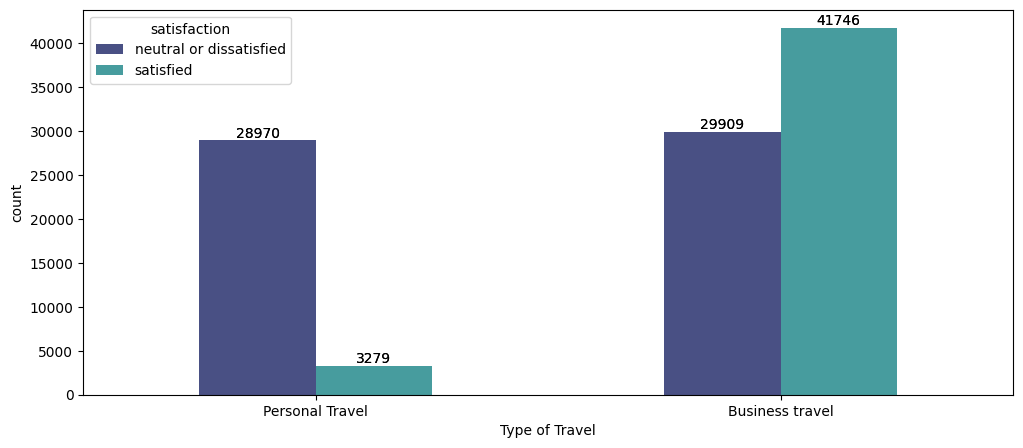

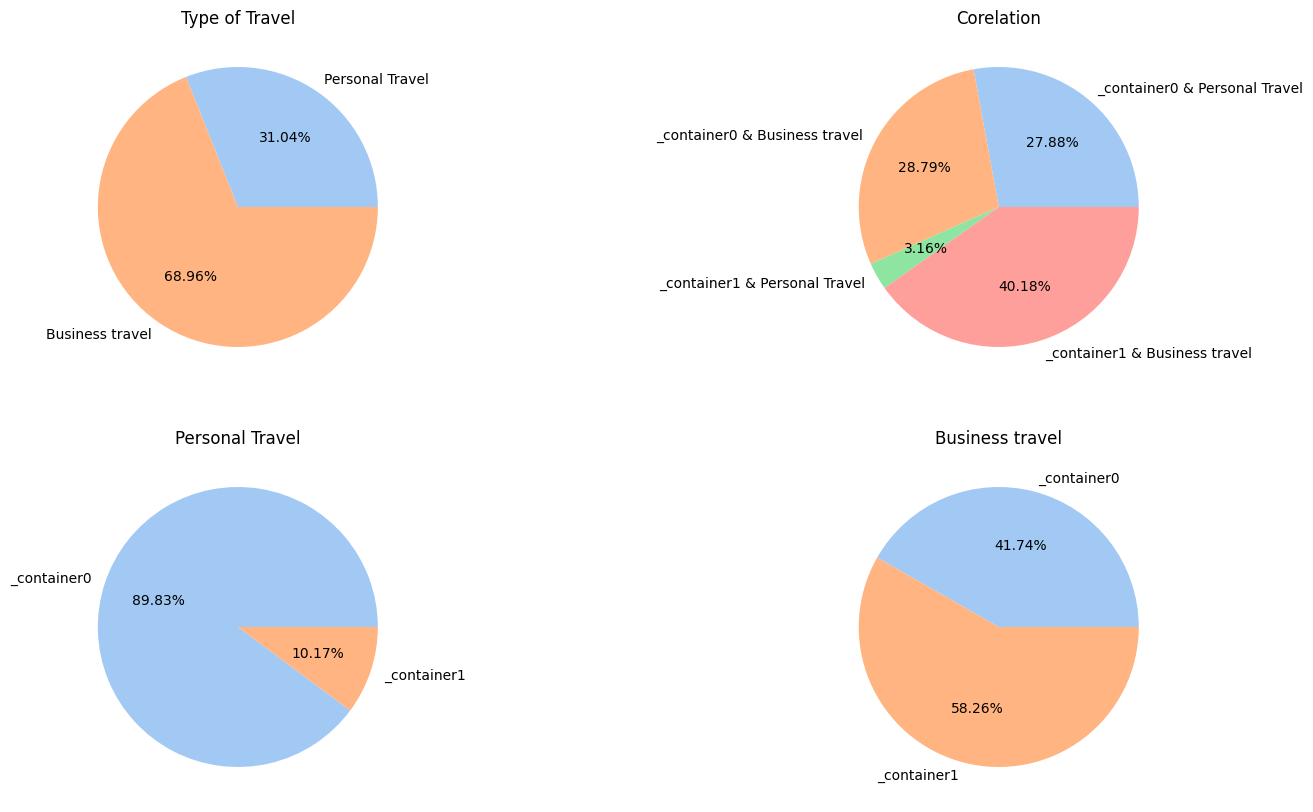

In [63]:
cat_vis('Type of Travel','satisfaction')

- Data for `Type of Travel` is biased towards 'Business Travel'.
- 'Business Travel' are more satisfied, that's why it's more correlated to satisfaction.
- so we use ordinal encoding `Type of Travel`.
  1. 'Business Travel'
  2. 'Personal Travel' 

4] Class:

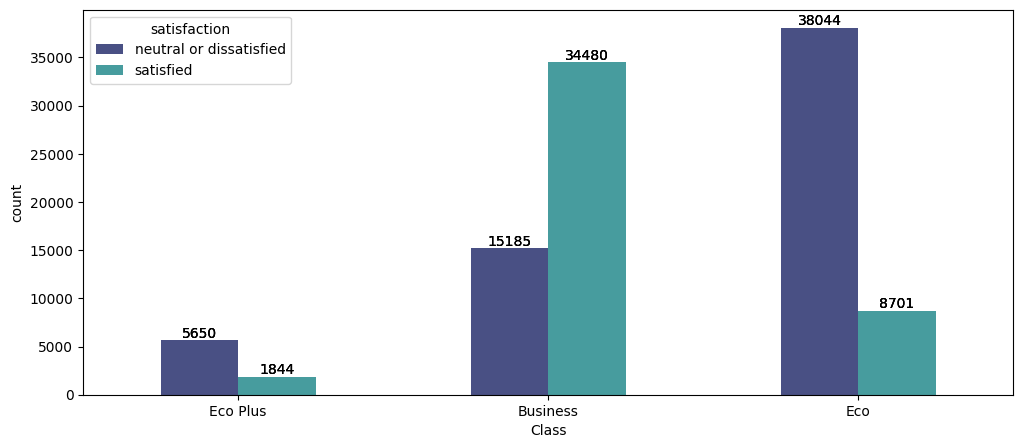

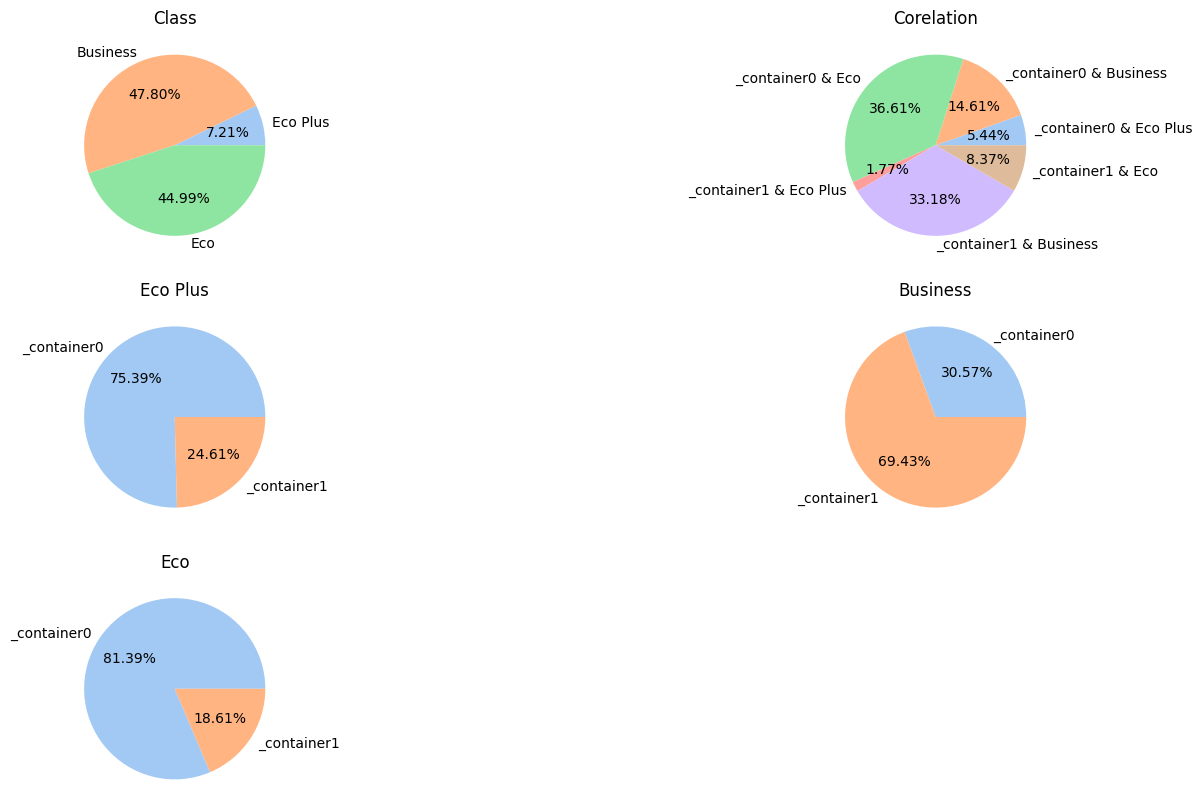

In [64]:
cat_vis('Class','satisfaction')

- Data for `Class` is biased towards 'Business'.
- 'Business' are more satisfied, that's why it's more correlated to satisfaction.
- so we use ordinal encoding `Class`.
  1. 'Business'
  2. 'Eco Plus' 
  3. 'Eco' 

5] Inflight wifi service:

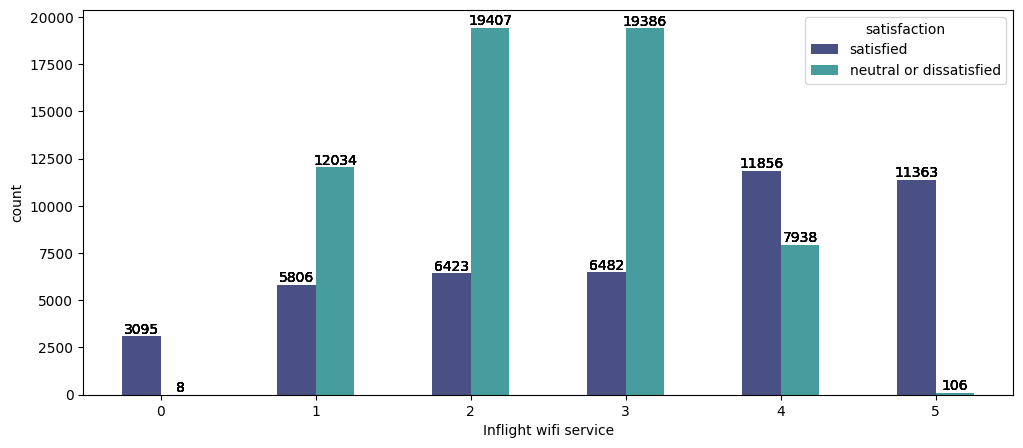

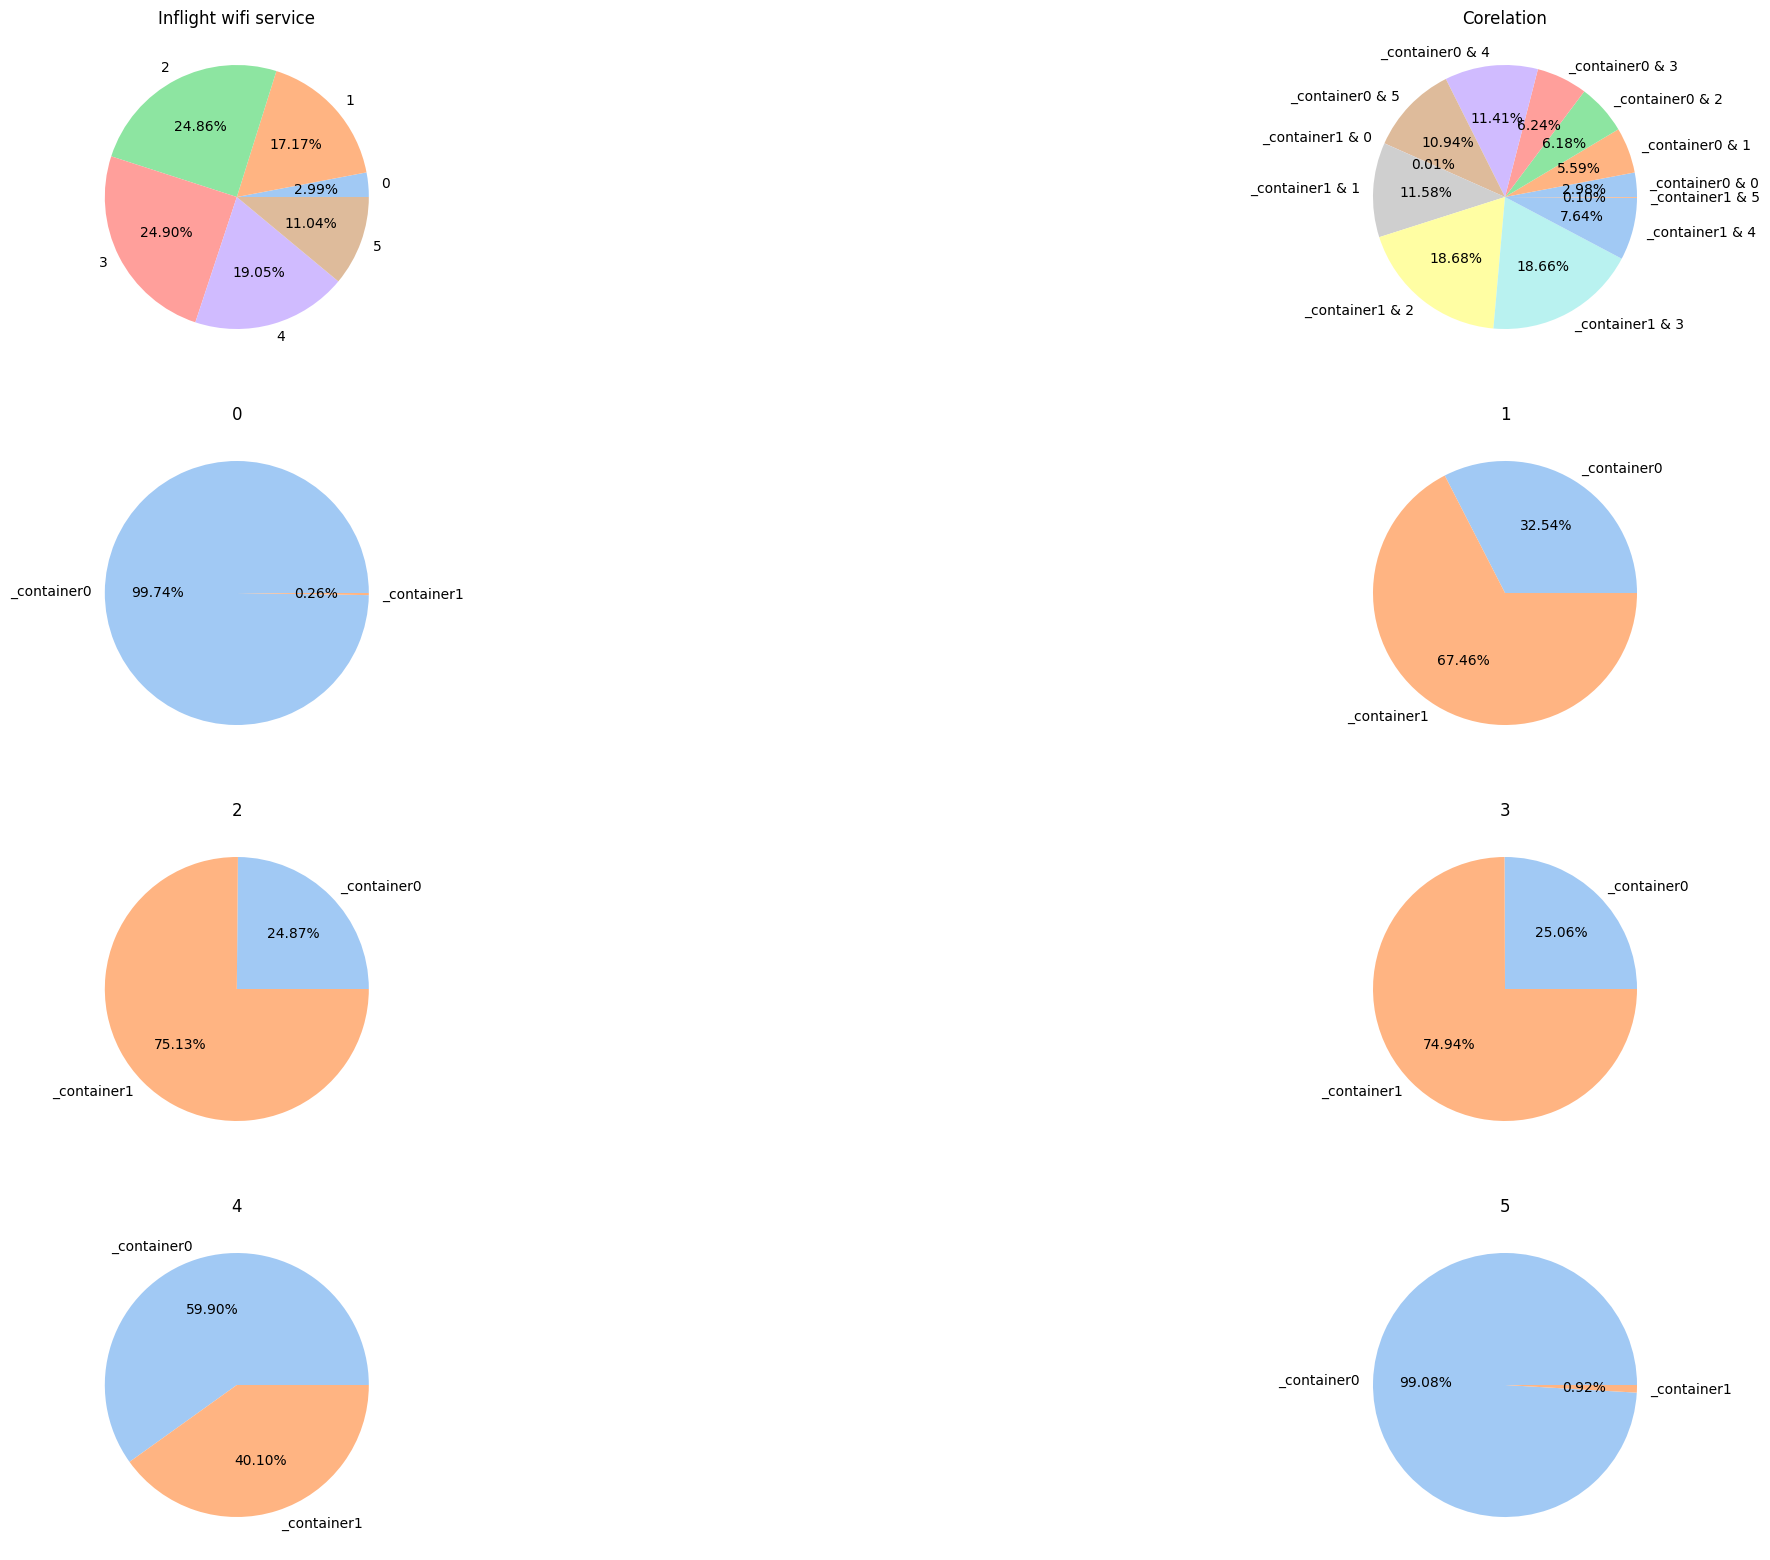

In [65]:
cat_vis('Inflight wifi service','satisfaction',f=30,g=30)

- Ordinal Encoding:
  1. --> 5
  2. --> 4
  3. --> 3
  4. --> 1
  5. --> 2
- And 0 is not applicable so we take them as null

6] Departure/Arrival time convenient:

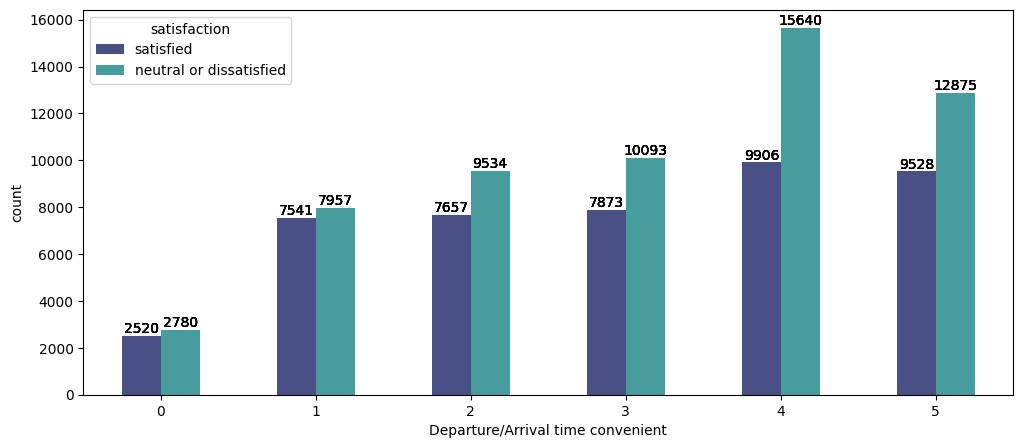

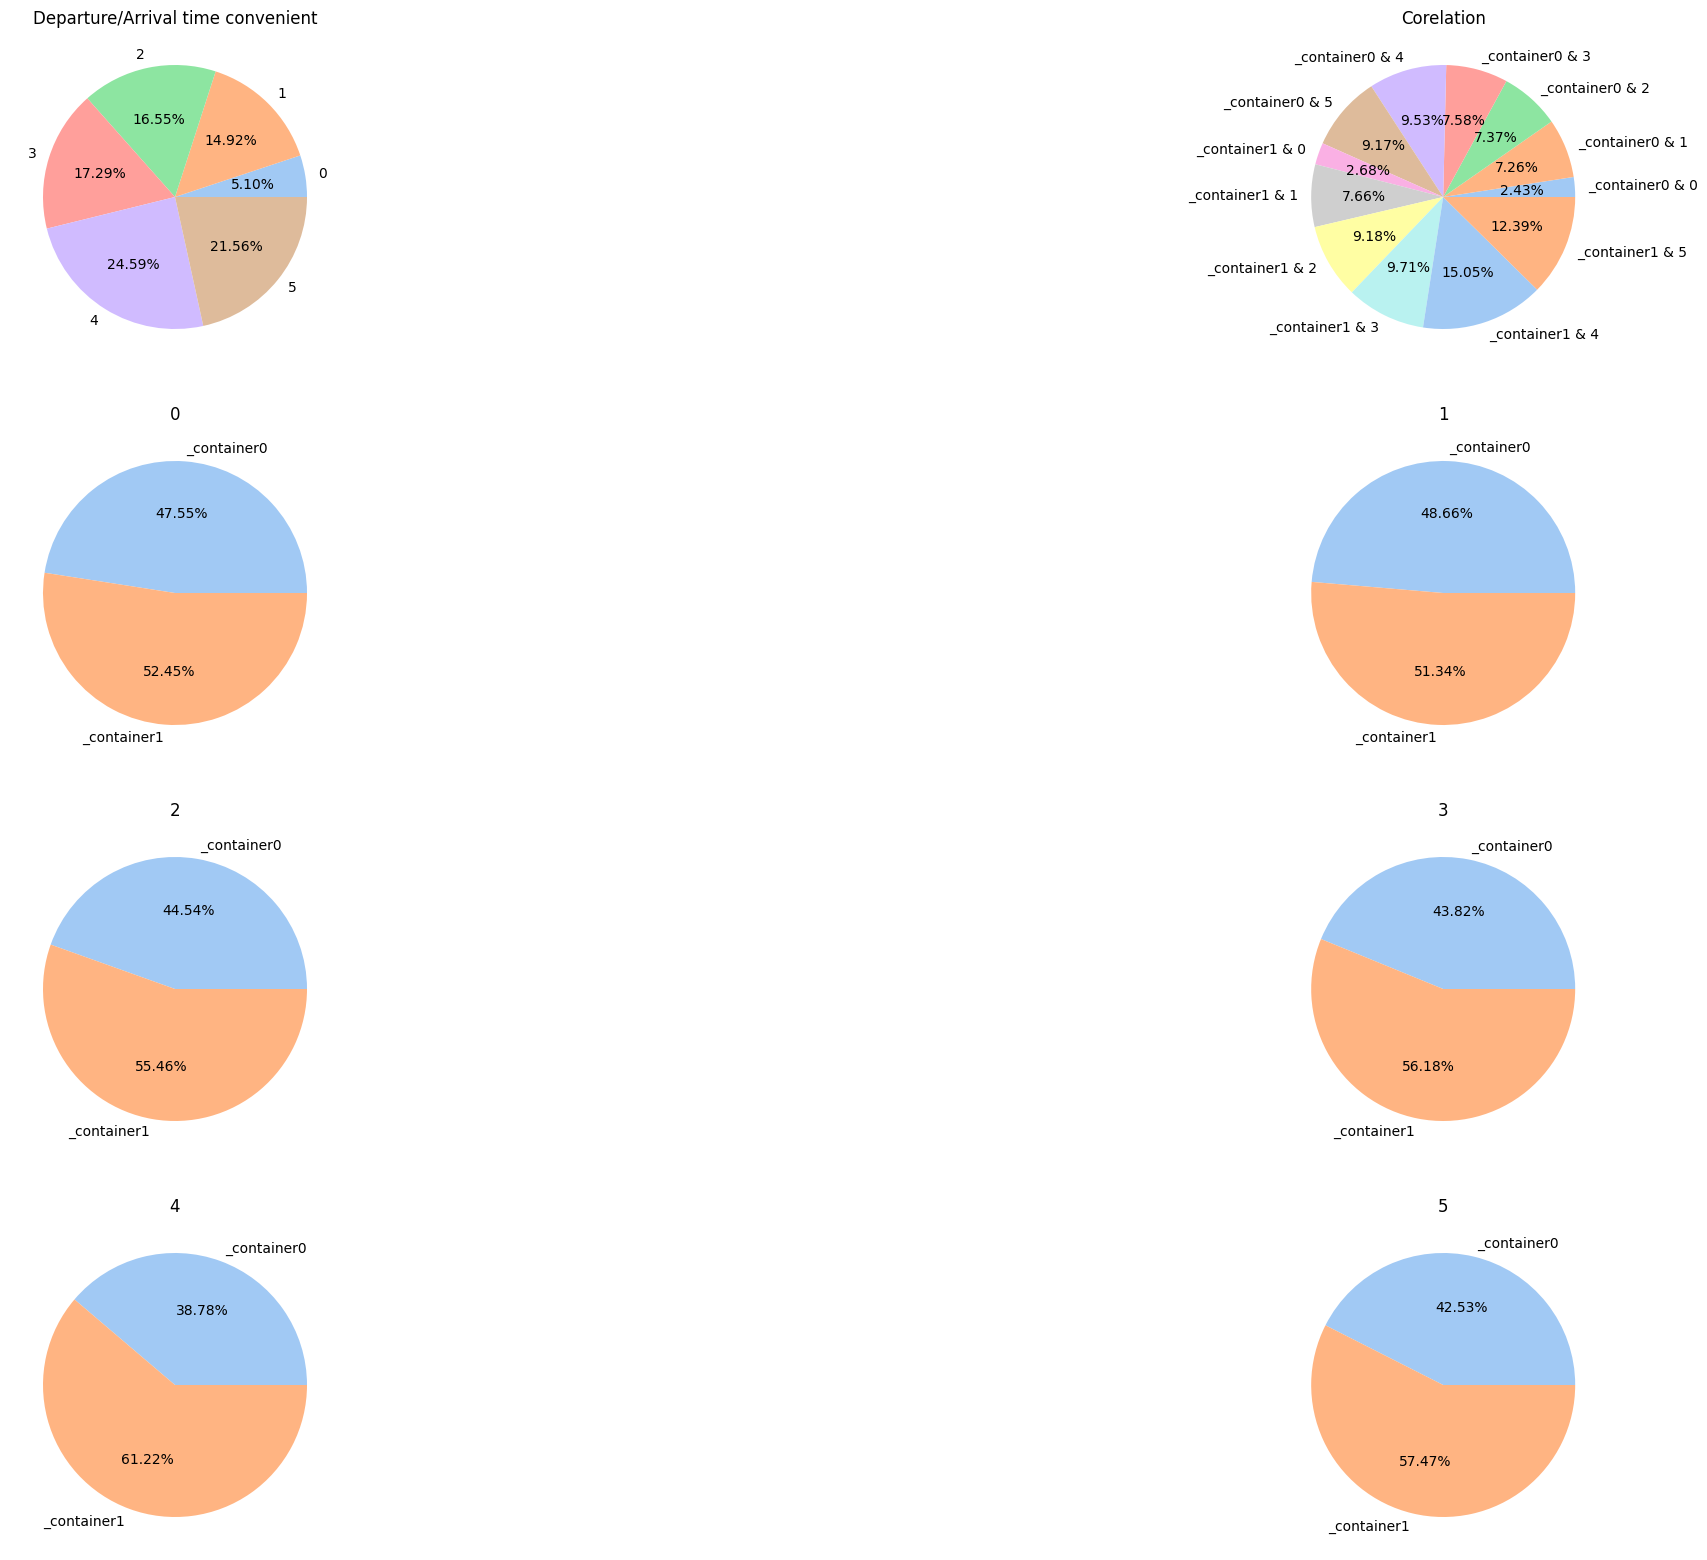

In [66]:
cat_vis('Departure/Arrival time convenient','satisfaction',f=30,g=30)

- Ordinal Encoding:
  1. --> 1
  2. --> 2
  3. --> 3
  4. --> 5
  5. --> 4
- And 0 is not applicable so we take them as null

7] Ease of Online booking:

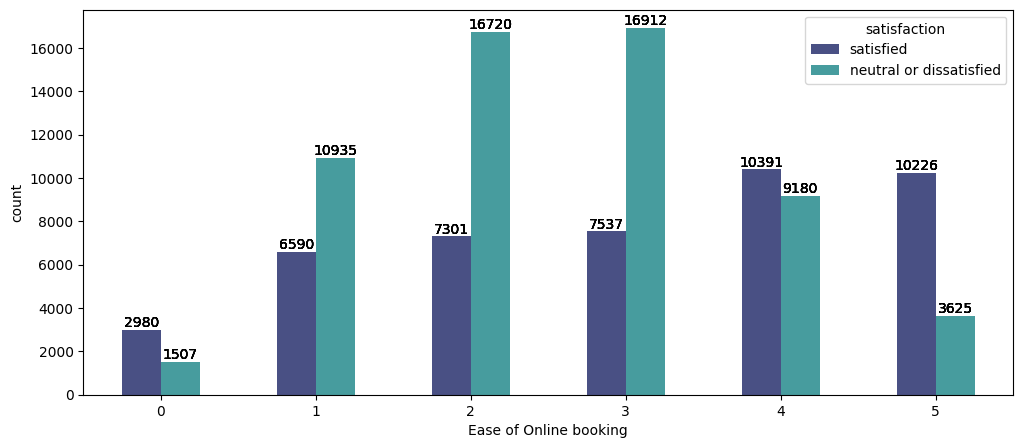

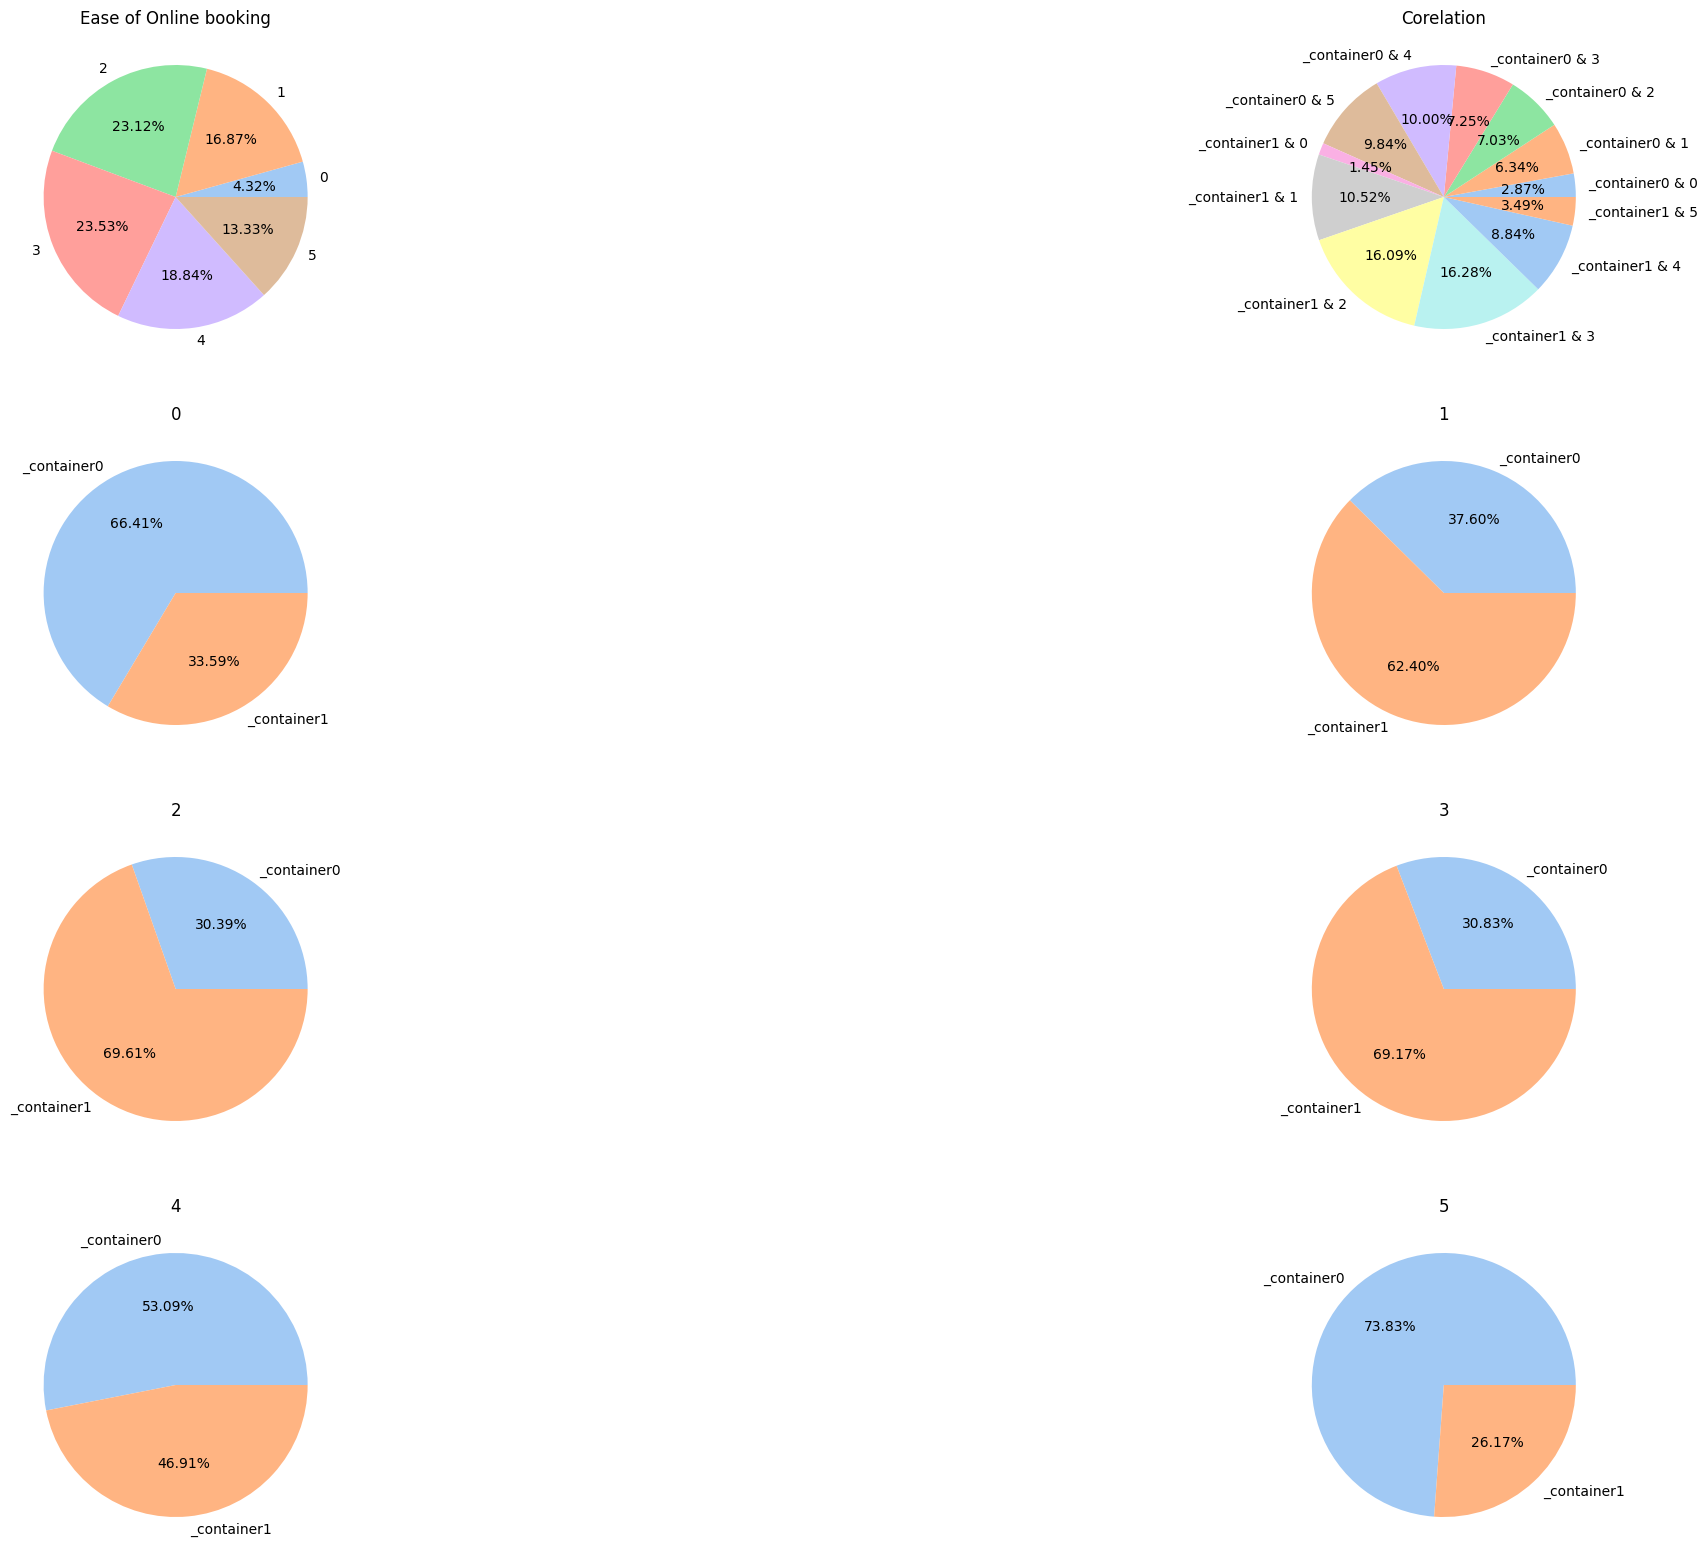

In [67]:
cat_vis('Ease of Online booking','satisfaction',f=30,g=30)

- Ordinal Encoding:
  1. --> 5
  2. --> 4
  3. --> 1
  4. --> 3
  5. --> 2
- And 0 is not applicable so we take them as null

8] Gate location:

In [68]:
# cat_vis('Gate location','satisfaction',f=30,g=30)

- Ordinal Encoding:
  1. --> 5
  2. --> 1
  3. --> 2
  4. --> 4
  5. --> 3
- And 0 is not applicable so we take them as null

9] Food and drink:

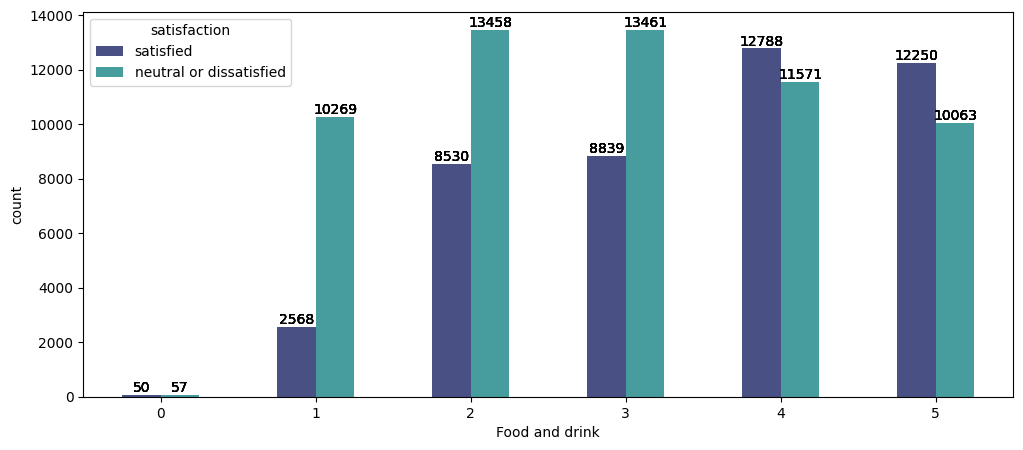

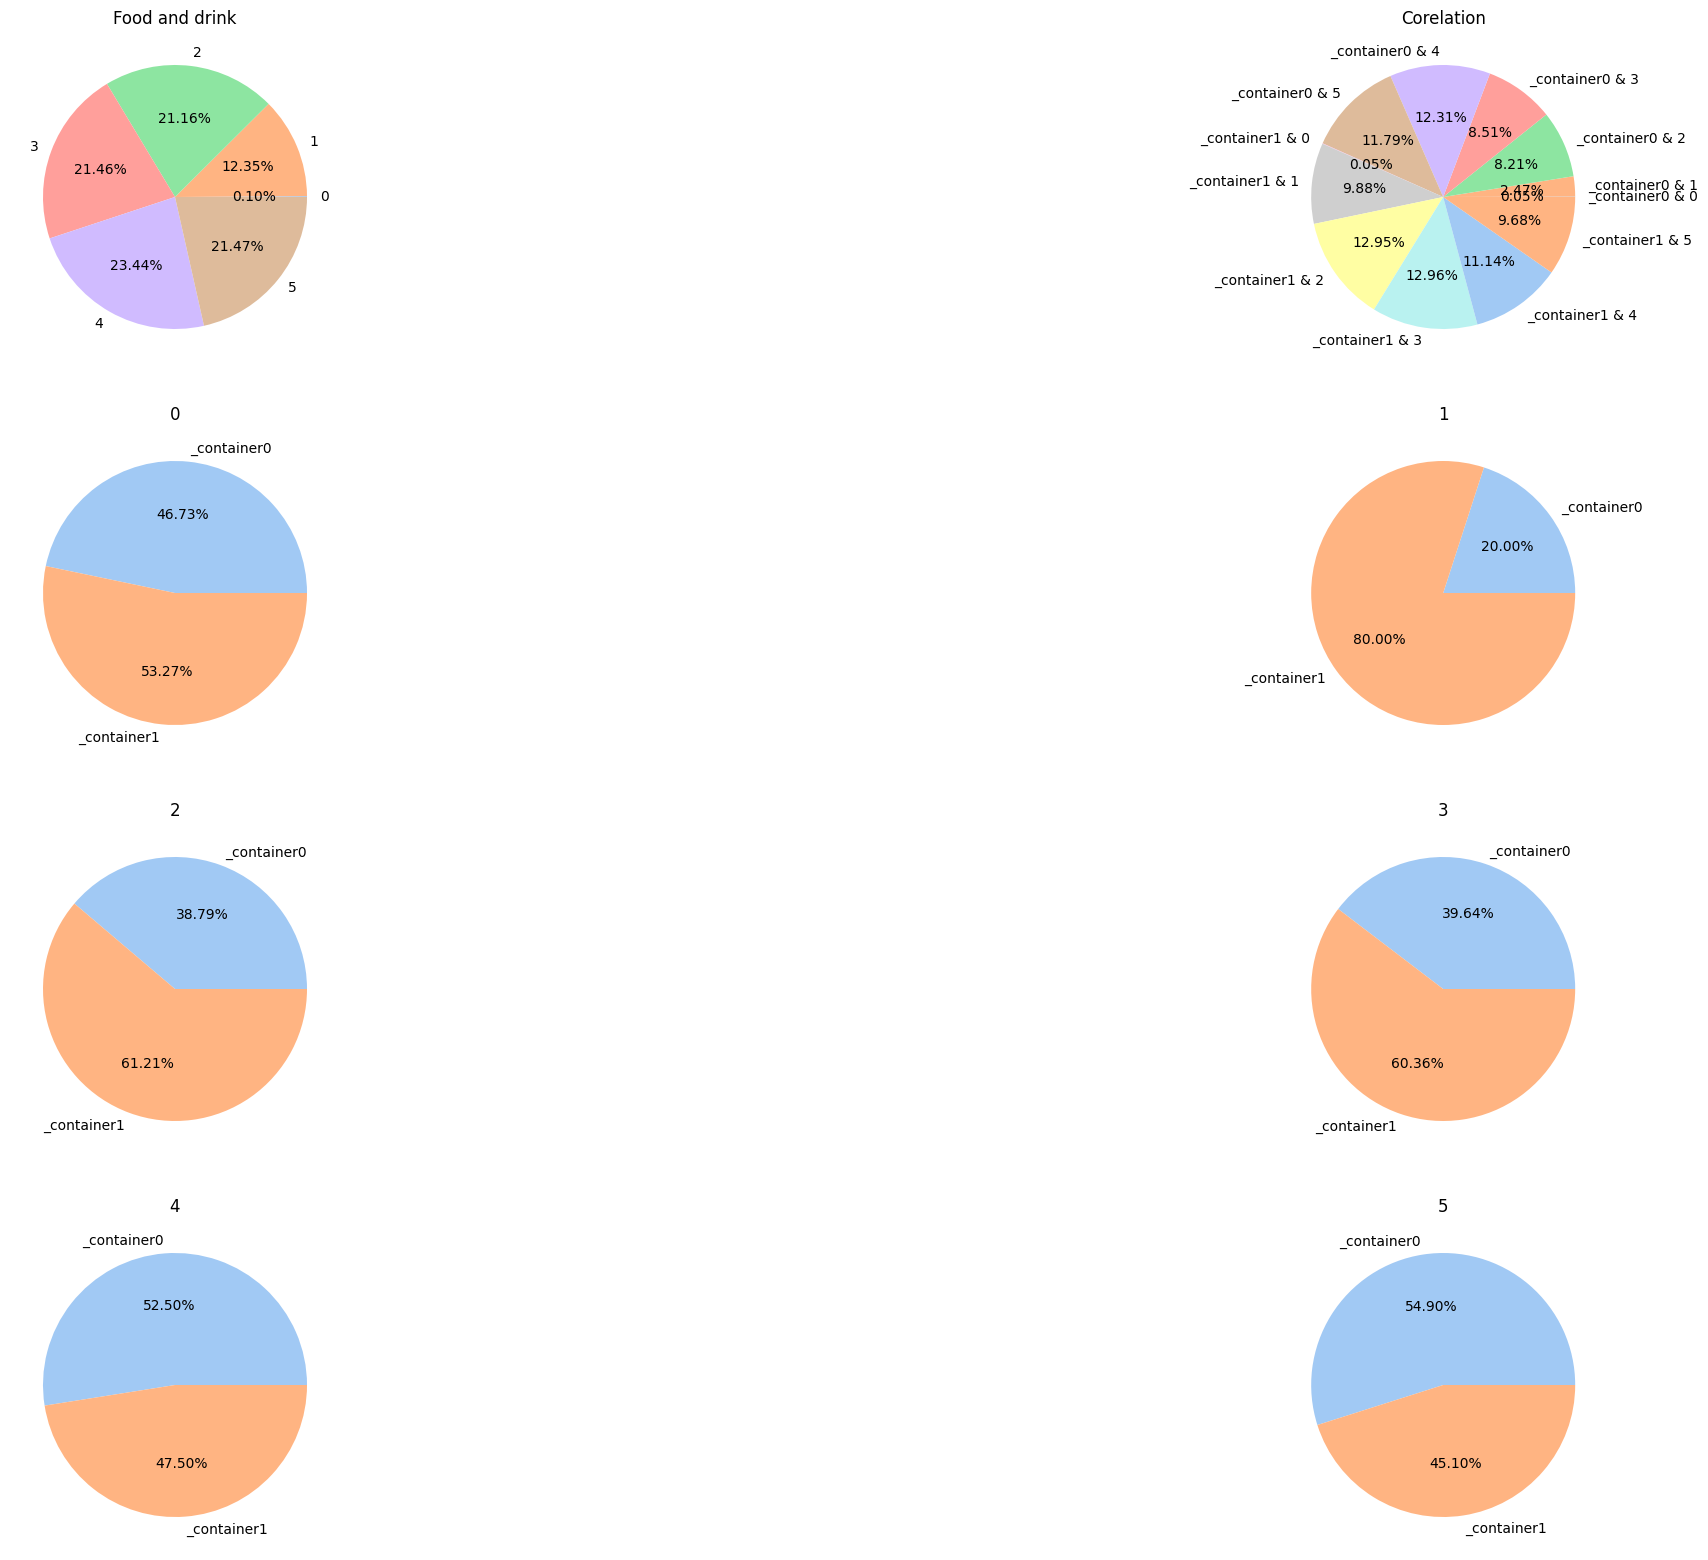

In [69]:
cat_vis('Food and drink','satisfaction',f=30,g=30)

- Ordinal Encoding:
  1. --> 5
  2. --> 4
  3. --> 3
  4. --> 2
  5. --> 1
- And 0 is not applicable so we take them as null

10] Online boarding:

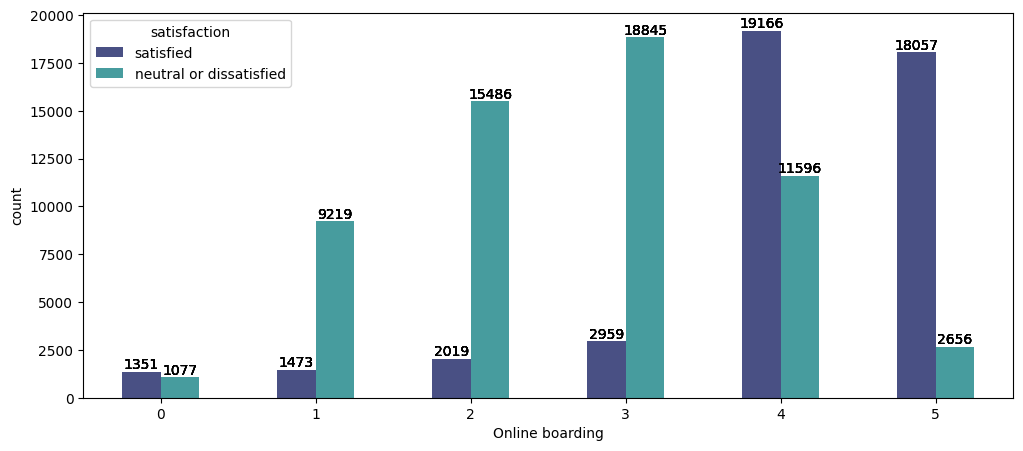

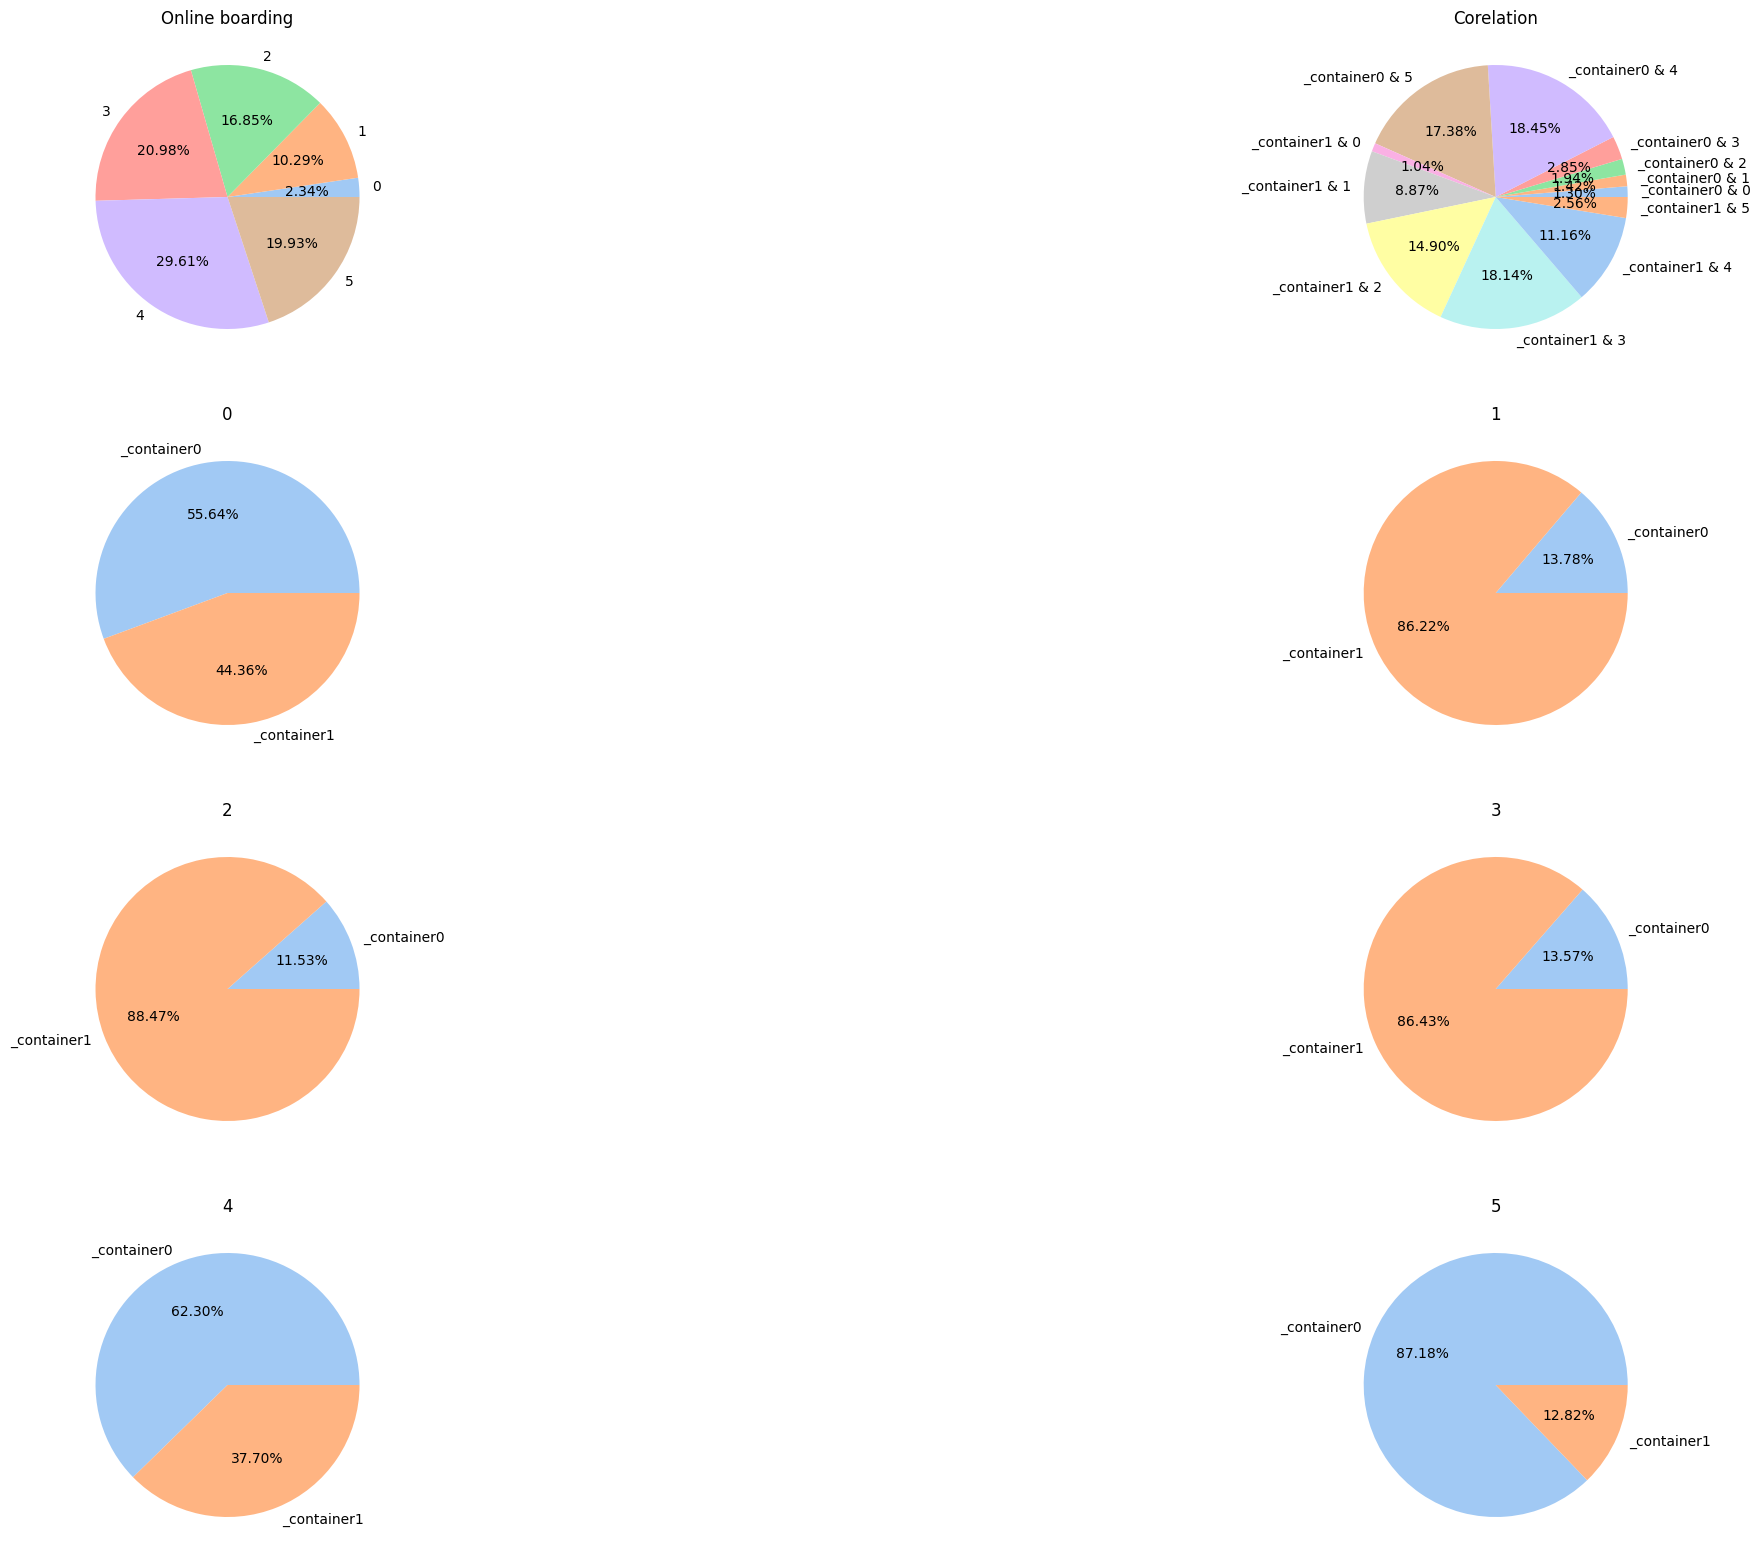

In [70]:
cat_vis('Online boarding','satisfaction',f=30,g=30)

- Ordinal Encoding:
  1. --> 5
  2. --> 4
  3. --> 1
  4. --> 3
  5. --> 2
- And 0 is not applicable so we take them as null

11] Seat comfort:

In [71]:
# cat_vis('Seat comfort','satisfaction',f=30,g=30)

- Ordinal Encoding:
  1. --> 5
  2. --> 4
  3. --> 2
  4. --> 1
  5. --> 3
- And 0 is not applicable so we take them as null

In [72]:
train['satisfaction'] = train['satisfaction'].replace('neutral or dissatisfied',0).replace('satisfied',1)
train['Customer Type'] = train['Customer Type'].replace('disloyal Customer',1).replace('Loyal Customer',2)
train['Type of Travel'] = train['Type of Travel'].replace('Personal Travel',1).replace('Business travel',2)
train['Class'] = train['Class'].replace('Eco',1).replace('Eco Plus',2).replace('Business',3)
bins = [0, 20,30, 38, 60,70,90]
train['Range'] = pd.cut(train['Age'],bins)
mapping = {'(0, 20]':1,'(20, 30]':3,'(30, 38]':4,'(38, 60]':6,'(60, 70]':2,'(70, 90]':5}
train['Range'] = train['Range'].astype('str').map(mapping)
train['Arrival Delay in Minutes'].fillna(value=0,inplace=True)
train.drop(columns={'id','Age','Gate location','Gender',},inplace=True)
test['Customer Type'] = test['Customer Type'].replace('disloyal Customer',1).replace('Loyal Customer',2)
test['Type of Travel'] = test['Type of Travel'].replace('Personal Travel',1).replace('Business travel',2)
test['Class'] = test['Class'].replace('Eco',1).replace('Eco Plus',2).replace('Business',3)
test['Range'] = pd.cut(test['Age'],bins)
test['Range'] = test['Range'].astype('str').map(mapping)
test['Arrival Delay in Minutes'].fillna(value=0,inplace=True)
test.drop(columns={'id','Age','Gate location','Gender',},inplace=True)
ytest = ytest.replace('neutral or dissatisfied',0).replace('satisfied',1)

C:\Users\manuj\AppData\Local\Temp\ipykernel_20604\2595565040.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['satisfaction'] = train['satisfaction'].replace('neutral or dissatisfied',0).replace('satisfied',1)
C:\Users\manuj\AppData\Local\Temp\ipykernel_20604\2595565040.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Customer Type'] = train['Customer Type'].replace('disloyal Customer',1).replace('Loyal Customer',2)
C:\Users\manuj\AppData\Local\Temp\ipykernel_20604\2595565040.py:3: FutureWarning: Downcasting beh

<Axes: >

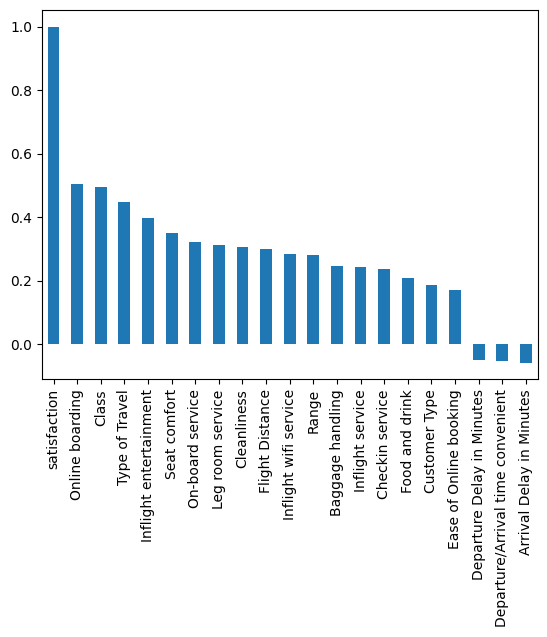

In [73]:
train.corr()['satisfaction'].sort_values(ascending=False).plot(kind='bar')

In [74]:
# plt.figure(figsize=(10,5))
# sns.histplot(data=train,x='Age',hue='satisfaction')

In [75]:
x= train.drop(columns={'satisfaction'})
y = train['satisfaction']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train.drop(columns={'satisfaction'}),train['satisfaction'],train_size=0.9)

In [77]:
# from sklearn.model_selection import StratifiedShuffleSplit
# splitter=StratifiedShuffleSplit(n_splits=1,random_state=12)
# for train,test in splitter.split(x,y):
#     x_train = x.iloc[train]
#     y_train = y.iloc[train]
#     x_test = x.iloc[test]
#     y_test = y.iloc[test]

In [78]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
dtc = DecisionTreeClassifier(max_depth=5)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
dtc.fit(x_train,y_train)
xgb.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [80]:
dtc.score(x_test,y_test)
xgb.score(x_test,y_test)

0.9699740159753633

In [81]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gdbt,
    'xgb' : xgb
}

def train_classifier(clf,x_train,y_train,x_test,y_test):
   clf.fit(x_train,y_train)
   y_pred = clf.predict(x_test)
   accuracy = accuracy_score(y_test,y_pred)
   precision = precision_score(y_test,y_pred)
   return accuracy,precision

accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test
,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

KeyboardInterrupt: 